In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DEBUG = False

In [3]:
# Defining parameters for the experiments:

M = 10
mu_b = 3
sigma_b = 1
mu_n = 3
sigma_n = 1

h = 1.0
p_list = [0.5, 1, 10, 100, 1000]
a_list = np.linspace(0, 2, 50)

num_iters = 500
time_horizon = 1000

In [4]:
data = []

for p in p_list:
    for a in a_list:
        print(f'Running experiment for a: {a} p: {p}, h: {h}')
        for _ in range(num_iters):
            state = M / 2
            tot_cost = 0.0
            for _ in range(time_horizon):
                if DEBUG: print(f'Current state: {state}')
                budget = np.random.normal(mu_b, sigma_b)
                demand = np.random.normal(mu_n, sigma_n)
                if DEBUG: print(f'Budget arrival: {budget} Demand arrival: {demand}')
                w = np.maximum(state + budget - demand*a - M, 0)
                v = np.abs(np.minimum(state + budget - demand*a, 0)) # amount you dip below zero
                tot_cost += h*w + p*v
                if DEBUG: print(f'w: {w}, v: {v}, tot_cost: {h*w+p*v}')
                state = np.clip(state+budget - demand*a, 0, M)
            data_dict = {'a': a, 
                         'p': p, 
                         'h': h, 
                         'mu_b': mu_b, 
                         'sigma_b': sigma_b,
                         'mu_n': mu_n,
                         'sigma_n': sigma_n,
                         'cost': tot_cost}
            data.append(data_dict)

Running experiment for a: 0.0 p: 0.5, h: 1.0
Running experiment for a: 0.04081632653061224 p: 0.5, h: 1.0
Running experiment for a: 0.08163265306122448 p: 0.5, h: 1.0
Running experiment for a: 0.12244897959183673 p: 0.5, h: 1.0
Running experiment for a: 0.16326530612244897 p: 0.5, h: 1.0
Running experiment for a: 0.2040816326530612 p: 0.5, h: 1.0
Running experiment for a: 0.24489795918367346 p: 0.5, h: 1.0
Running experiment for a: 0.2857142857142857 p: 0.5, h: 1.0
Running experiment for a: 0.32653061224489793 p: 0.5, h: 1.0
Running experiment for a: 0.36734693877551017 p: 0.5, h: 1.0
Running experiment for a: 0.4081632653061224 p: 0.5, h: 1.0
Running experiment for a: 0.44897959183673464 p: 0.5, h: 1.0
Running experiment for a: 0.4897959183673469 p: 0.5, h: 1.0
Running experiment for a: 0.5306122448979591 p: 0.5, h: 1.0
Running experiment for a: 0.5714285714285714 p: 0.5, h: 1.0
Running experiment for a: 0.6122448979591836 p: 0.5, h: 1.0
Running experiment for a: 0.6530612244897959 p:

Running experiment for a: 1.6326530612244896 p: 10, h: 1.0
Running experiment for a: 1.673469387755102 p: 10, h: 1.0
Running experiment for a: 1.7142857142857142 p: 10, h: 1.0
Running experiment for a: 1.7551020408163265 p: 10, h: 1.0
Running experiment for a: 1.7959183673469385 p: 10, h: 1.0
Running experiment for a: 1.8367346938775508 p: 10, h: 1.0
Running experiment for a: 1.8775510204081631 p: 10, h: 1.0
Running experiment for a: 1.9183673469387754 p: 10, h: 1.0
Running experiment for a: 1.9591836734693877 p: 10, h: 1.0
Running experiment for a: 2.0 p: 10, h: 1.0
Running experiment for a: 0.0 p: 100, h: 1.0
Running experiment for a: 0.04081632653061224 p: 100, h: 1.0
Running experiment for a: 0.08163265306122448 p: 100, h: 1.0
Running experiment for a: 0.12244897959183673 p: 100, h: 1.0
Running experiment for a: 0.16326530612244897 p: 100, h: 1.0
Running experiment for a: 0.2040816326530612 p: 100, h: 1.0
Running experiment for a: 0.24489795918367346 p: 100, h: 1.0
Running experime

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head(5)

,a,p,h,mu_b,sigma_b,mu_n,sigma_n,cost
0,0.0,0.5,1.0,3,1,3,1,2963.196561
1,0.0,0.5,1.0,3,1,3,1,2990.355888
2,0.0,0.5,1.0,3,1,3,1,3001.923510
3,0.0,0.5,1.0,3,1,3,1,3022.676611
4,0.0,0.5,1.0,3,1,3,1,2992.765228


In [7]:
# Compute the average cost for each (p, h, mu_b, sigma_b, mu_n, a) group
avg_cost_df = df.groupby(["p", "h", "mu_b", "sigma_b", "mu_n", "sigma_n", "a"])["cost"].mean().reset_index()

# Find the "a" with the maximum average cost for each (p, h, mu_b, sigma_b, mu_n) group
idx = avg_cost_df.groupby(["p", "h", "mu_b", "sigma_b", "mu_n", "sigma_n"])["cost"].idxmin()
result_df = avg_cost_df.loc[idx]


In [8]:
avg_cost_df

,p,h,mu_b,sigma_b,mu_n,sigma_n,a,cost
0,0.5,1.0,3,1,3,1,0.000000,2.994283e+03
1,0.5,1.0,3,1,3,1,0.040816,2.872647e+03
2,0.5,1.0,3,1,3,1,0.081633,2.748857e+03
3,0.5,1.0,3,1,3,1,0.122449,2.628605e+03
4,0.5,1.0,3,1,3,1,0.163265,2.504186e+03
...,...,...,...,...,...,...,...,...
245,1000.0,1.0,3,1,3,1,1.836735,2.502356e+06
246,1000.0,1.0,3,1,3,1,1.877551,2.627587e+06
247,1000.0,1.0,3,1,3,1,1.918367,2.748492e+06
248,1000.0,1.0,3,1,3,1,1.959184,2.876743e+06


In [9]:
result_df

,p,h,mu_b,sigma_b,mu_n,sigma_n,a,cost
25,0.5,1.0,3,1,3,1,1.020408,118.976741
74,1.0,1.0,3,1,3,1,0.979592,174.850049
122,10.0,1.0,3,1,3,1,0.897959,370.330019
171,100.0,1.0,3,1,3,1,0.857143,569.854087
219,1000.0,1.0,3,1,3,1,0.775510,714.216221


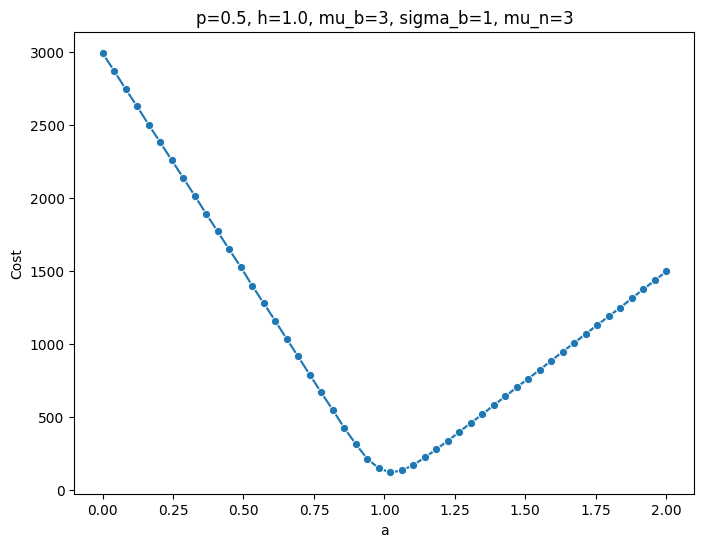

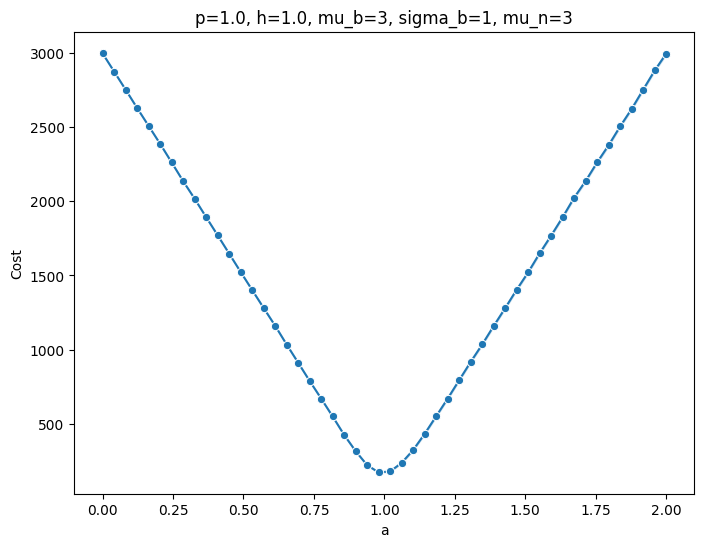

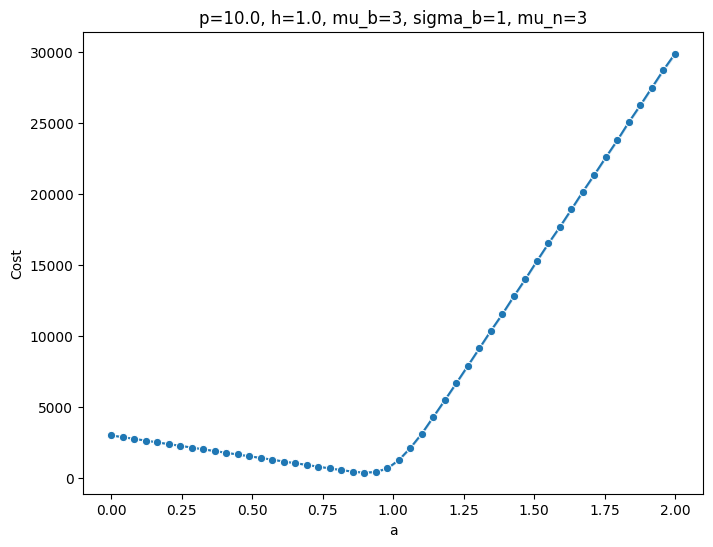

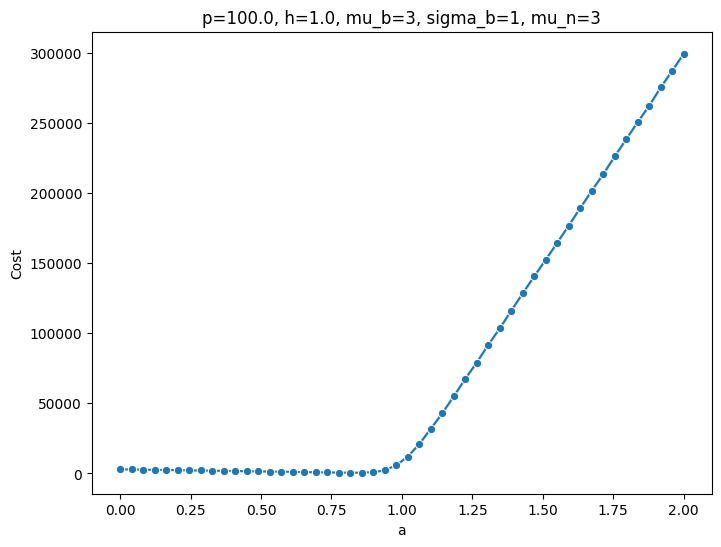

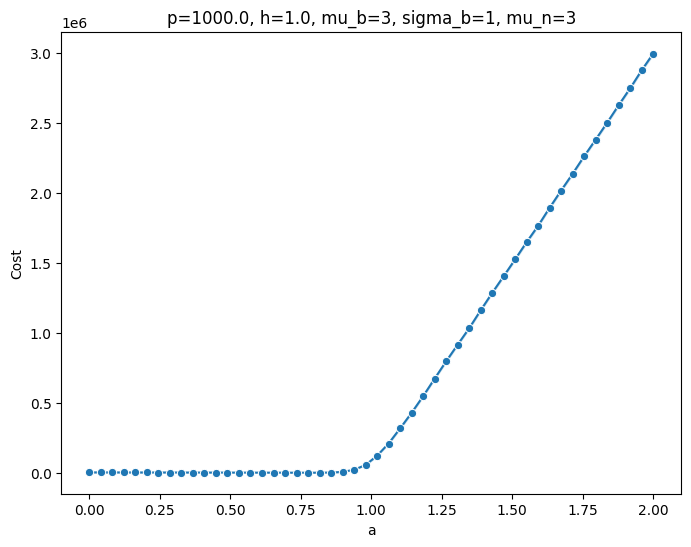

In [10]:
# Group by unique (p, h, mu_b, sigma_b, mu_n) combinations
grouped = df.groupby(['p', 'h', 'mu_b', 'sigma_b', 'mu_n'])

# Generate plots for each group
for (p, h, mu_b, sigma_b, mu_n), group in grouped:
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=group, x='a', y='cost', marker='o')
    
    # Title and labels
    plt.title(f'p={p}, h={h}, mu_b={mu_b}, sigma_b={sigma_b}, mu_n={mu_n}')
    plt.xlabel('a')
    plt.ylabel('Cost')
    
    # Show the plot
    plt.show()